# Data Analysis
**Some information about the data**

In [1]:
from pyimzml.ImzMLParser import ImzMLParser

p = ImzMLParser('../Data/LPS/LPS1.imzml')
my_spectra = []
for idx, (x,y,z) in enumerate(p.coordinates):
    mzs, intensities = p.getspectrum(idx)
    my_spectra.append([mzs, intensities, (x, y, z)])

/home/vmuser/anaconda3/lib/python3.12/site-packages/pyimzml/ontology/ontology.py:80: UserWarning: Unrecognized accession in <cvParam>:  (name: "").
  warn('Unrecognized accession in <cvParam>: %s (name: "%s").' % (accession, raw_name))
/home/vmuser/anaconda3/lib/python3.12/site-packages/pyimzml/ontology/ontology.py:92: UserWarning: Accession IMS:1000042 found with incorrect name "max count of pixel x". Updating name to "max count of pixels x".
  warn(
/home/vmuser/anaconda3/lib/python3.12/site-packages/pyimzml/ontology/ontology.py:92: UserWarning: Accession IMS:1000043 found with incorrect name "max count of pixel y". Updating name to "max count of pixels y".
  warn(
/home/vmuser/anaconda3/lib/python3.12/site-packages/pyimzml/ontology/ontology.py:92: UserWarning: Accession IMS:1000046 found with incorrect name "pixel size x". Updating name to "pixel size (x)".
  warn(


In [2]:
# Min of max  recorded mzs and intensities
import math
max_mz = -float('inf')
max_intensity = -float('inf')
min_mz = float('inf')
min_intensity = float('inf')
coordinates = []
for spectrum in my_spectra:
    max_mz = math.ceil(max(max(spectrum[0]),max_mz))
    min_mz = math.floor(min(min(spectrum[0]),min_mz))
    max_intensity = max(max(spectrum[1]),max_intensity)
    min_intensity = min(min(spectrum[1]),min_intensity)

print(f'Range of mz values:',(min_mz,max_mz))
print(f'Range of intensities values:',(min_intensity,max_intensity))
print(f'Number of spectrum:',len(my_spectra))

print(my_spectra[0][2])



Range of mz values: (150, 2000)
Range of intensities values: (52.31201, 77369.5)
Number of spectrum: 1640
(0, 1, 1)


In [3]:
# import numpy as np
# with open("HIV_Coordinates.npy",'wb') as file:
#     np.save(file, np.array(coordinates))
# print(my_spectra[0][2])

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Creating histogram to see the distribution of recorded m/z values
# For a given tolerance
tolerance = 0.02

histogram_data = np.array([[0,0]])
most_commmon_mz = [0,0]

# I will target the mz values between the min and max mz found incrementing by 10
for mz in np.arange(math.floor(min_mz), math.ceil(max_mz), 0.02):
    count = 0
    for mzs,_,_ in my_spectra:
        mz_mask = (mzs >= mz - tolerance) & (mzs <= mz + tolerance)
        # mz_mask is an array of the same size as mzs and has a true where there is a an mz in mzs that is in the range
        # If a single true is found we add the spectrum(pixel) to the count for the range we are looking for 
        if np.any(mz_mask):
            count += 1
            # go to next spectrum
            continue
 
    data = np.array([mz, count])
    if  count > most_commmon_mz[1]:
        most_commmon_mz = data  
    # histogram_data = np.vstack([histogram_data, data])



print(f'The most frequently occuring mz range is mz={most_commmon_mz[0]} with {most_commmon_mz[1]} spectra')
print(f'This constitutes {(most_commmon_mz[1]/len(my_spectra))*100} % of the pixels')

KeyboardInterrupt: 

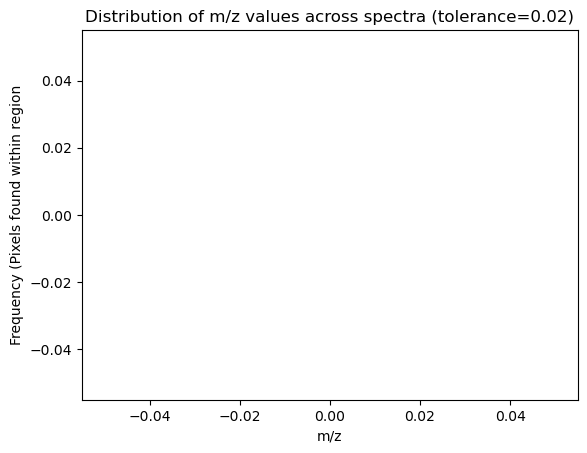

In [5]:
plt.bar(histogram_data[1:,0], histogram_data[1:,1],width=6,color="g")
plt.xlabel('m/z')
plt.ylabel('Frequency (Pixels found within region')
plt.title(f'Distribution of m/z values across spectra (tolerance={tolerance})')
plt.show()